# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

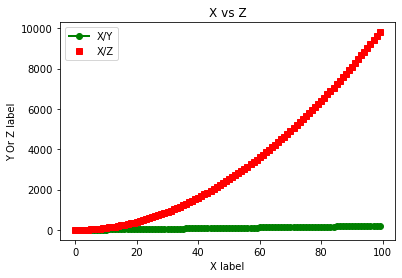

In [3]:
# Method 1
plt.plot(x, y, 'go-' ,label='X/Y',linewidth=2)
plt.plot(x, z, 'rs',label='X/Z',linewidth=2)
plt.xlabel('X label')
plt.ylabel('Y Or Z label')
plt.title("X vs Z")
plt.legend()
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

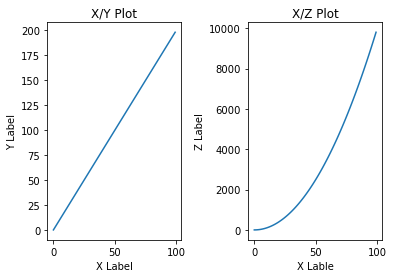

In [4]:
# Method 2
fig, [xy, xz] = plt.subplots(1,2)

plt.subplots_adjust(wspace=0.5)
xy.plot(x,y)
xy.set_title('X/Y Plot')   
xy.set_xlabel('X Label')     
xy.set_ylabel('Y Label')   

xz.plot(x,z)
xz.set_title('X/Z Plot')
xz.set_xlabel('X Lable')
xz.set_ylabel('Z Label')

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

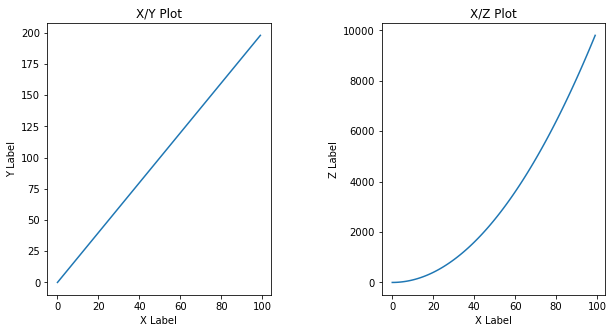

In [5]:
# your code here
fig, [xy, xz] = plt.subplots(1,2, figsize=(10, 5))

plt.subplots_adjust(wspace=0.5)
xy.plot(x,y)
xy.set_title('X/Y Plot')   
xy.set_xlabel('X Label')     
xy.set_ylabel('Y Label')   

xz.plot(x,z)
xz.set_title('X/Z Plot')
xz.set_xlabel('X Label')
xz.set_ylabel('Z Label')

plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

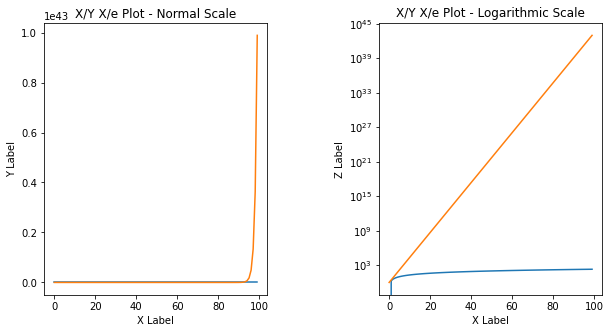

In [6]:
# your code here
e = np.exp(x)
fig, [xnorm, xlog] = plt.subplots(1,2, figsize=(10, 5))

plt.subplots_adjust(wspace=0.5)
xnorm.plot(x,y,e)
xnorm.set_title('X/Y X/e Plot - Normal Scale')   
xnorm.set_xlabel('X Label')     
xnorm.set_ylabel('Y Label')   

xlog.plot(x,y,e)
xlog.set_title('X/Y X/e Plot - Logarithmic Scale')
xlog.set_xlabel('X Label')
xlog.set_ylabel('Z Label')
xlog.set_yscale('log')
# xlog.set_xscale('log')

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

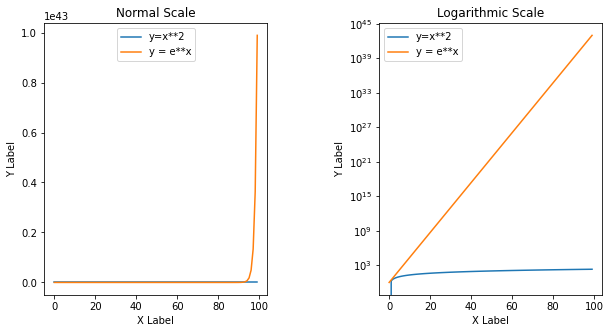

In [7]:
# your code here
fig, [xnorm, xlog] = plt.subplots(1,2, figsize=(10, 5))

xnorm.plot(x,y, label='y=x**2')
xnorm.plot(x,e, label='y = e**x')
xnorm.set_title('Normal Scale')   
xnorm.set_xlabel('X Label')     
xnorm.set_ylabel('Y Label')   
xnorm.legend(loc="upper center")

xlog.plot(x,y, label='y=x**2')
xlog.plot(x,e, label='y = e**x')
xlog.set_title('Logarithmic Scale')
xlog.set_xlabel('X Label')
xlog.set_ylabel('Y Label')
xlog.set_yscale('log')
xlog.legend(loc="upper left")

plt.subplots_adjust(wspace=0.5)
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [8]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

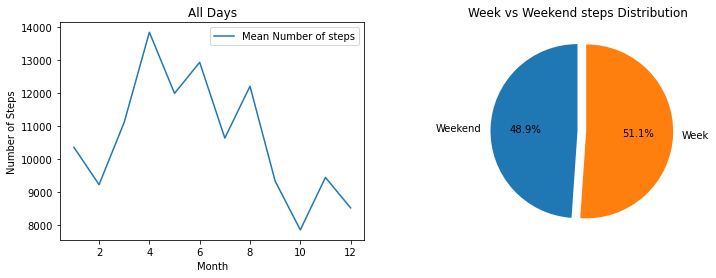

In [12]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
by_month = fitbit.groupby(['Months_encoded'])['Steps'].agg('median').reset_index()
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
by_daytype = fitbit.groupby(['Work_or_Weekend'])['Steps'].agg('median').reset_index()

fig, [month, daytype] = plt.subplots(1,2, figsize=(12, 4))
month.plot(by_month['Months_encoded'], by_month['Steps'], label='Mean Number of steps')
month.set_title('All Days')
month.set_xlabel('Month')   
month.set_ylabel('Number of Steps')
month.legend(loc="upper right")
daytype.set_title('Week vs Weekend steps Distribution')
daytype.pie(by_daytype['Steps'], labels=['Weekend','Week'], explode = (0, 0.1), autopct='%1.1f%%', startangle=90)
# plt.show()
plt.savefig('../figures/fitbit - 1.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

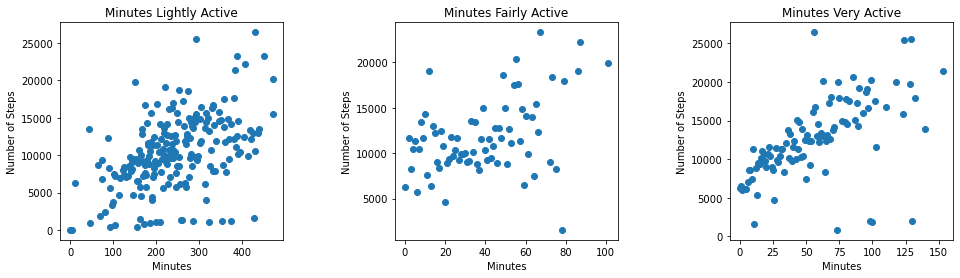

In [17]:
# your code here
fields = ['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']
y = 'Steps'
ax = 0

fig, axs = plt.subplots(1,len(fields),figsize=(16, 4))
plt.subplots_adjust(wspace=0.5)
for f in fields:
    data = fitbit.groupby(f)[y].agg('median').reset_index()
    axs[ax].scatter(data[f], data[y], label=f)
    axs[ax].set_title(f)
    axs[ax].set_xlabel('Minutes')   
    axs[ax].set_ylabel('Number of Steps')
    ax += 1

plt.savefig('../figures/fitbit - 2.png')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [18]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


#### Explore the titanic dataset using Pandas dtypes.

In [19]:
# your code here
titanic.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [20]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes('number')

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000
883,1,1,19.0,0,0,30.0000
884,0,3,7.0,1,2,23.4500
885,1,1,26.0,0,0,30.0000


In [23]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes('category')

""
0
1
2
3
4
...
882
883
884
885


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

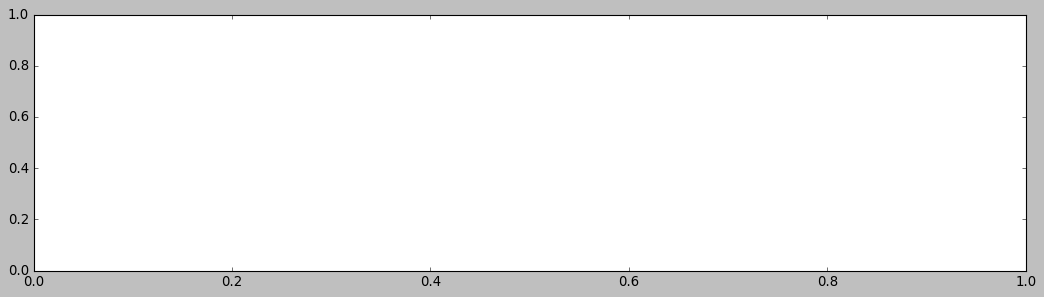

In [24]:
# your code here
  
fig, axs = plt.subplots(figsize=(16, 4))
plt.style.use('classic')
plt.subplots_adjust(wspace=0.5)      

# plt.style('normal')

#### Use the right visulalization to show the distribution of column `Age`.

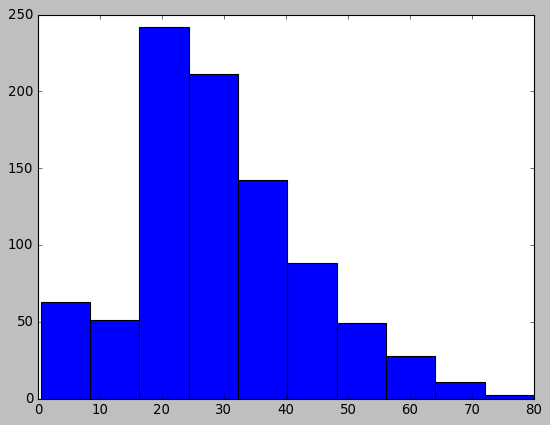

In [25]:
# your code here
plt.hist(titanic['Age'])  
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

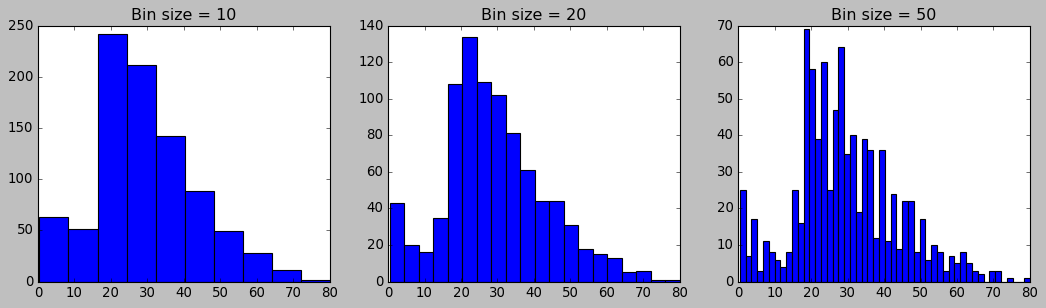

In [26]:
# your code here
bins = [10, 20, 50]

fig, ax = plt.subplots(1,len(bins),figsize=(16,4))

i = 0

for b in bins:
    plt.sca(ax[i])
    ax[i] = plt.hist(titanic['Age'],bins=b)
    ax[i] = plt.title("Bin size = " + str(b))
    i += 1

#### How does the bin size affect your plot?

In [27]:
"""
The data is more compartimentalized and the categories are smaller. Also the type of distribution starts to change.
"""

'\nThe data is more compartimentalized and the categories are smaller. Also the type of distribution starts to change.\n'

#### Use seaborn to show the distribution of column `Age`.

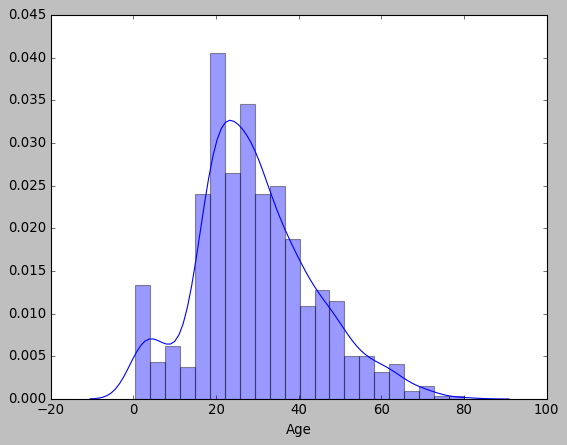

In [28]:
# your code here
sns.distplot(titanic['Age'])



#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

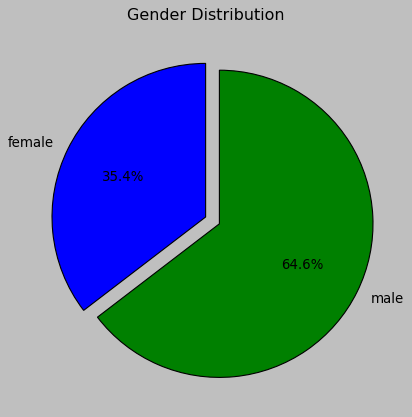

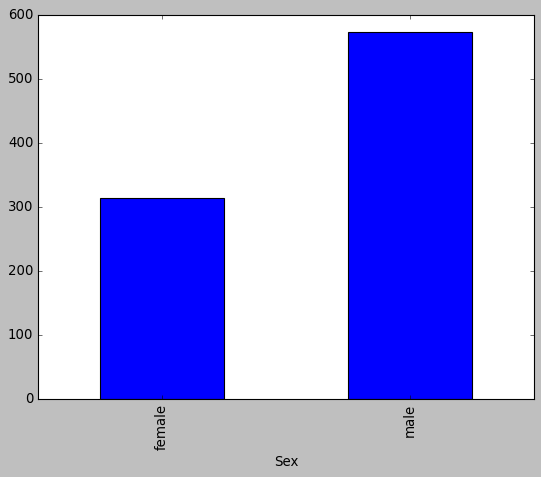

In [29]:
# Method 1 - matplotlib
# your code here
gender_data = titanic.groupby('Sex')['Name'].agg('count')
# Using pie chart
plt.title("Gender Distribution")
plt.pie(gender_data, labels=gender_data.index.tolist(), explode = (0, 0.1), autopct='%1.1f%%', startangle=90)
plt.show()
gender_data.plot(kind='bar')
plt.show()

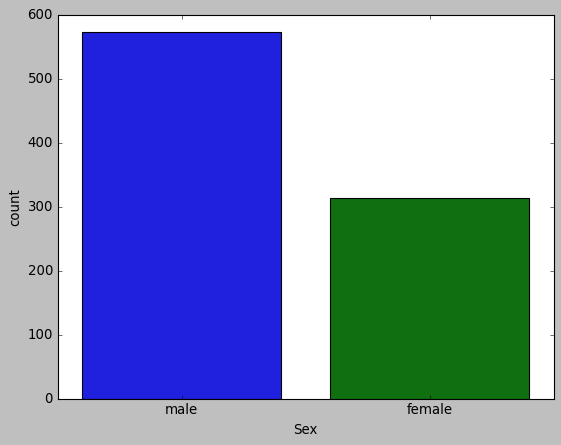

In [30]:
# Method 2 - seaborn
# your code here
# gender_data.reset_index(inplace=True)
# print(gender_data)
sns.countplot(x ='Sex', data = titanic)
plt.show()

#### Use the right plot to visualize the column `Pclass`.

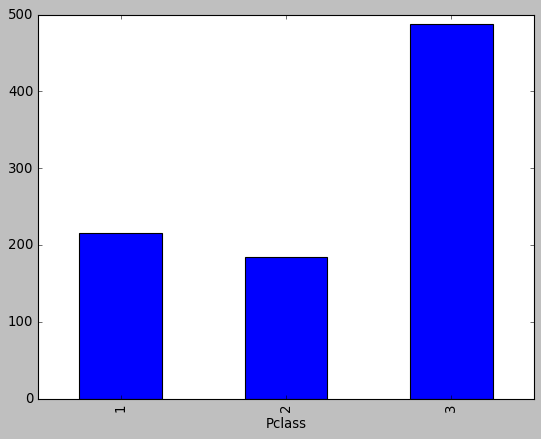

In [31]:
# your code here
titanic.groupby('Pclass').agg('count')['Name'].plot(kind='bar')

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

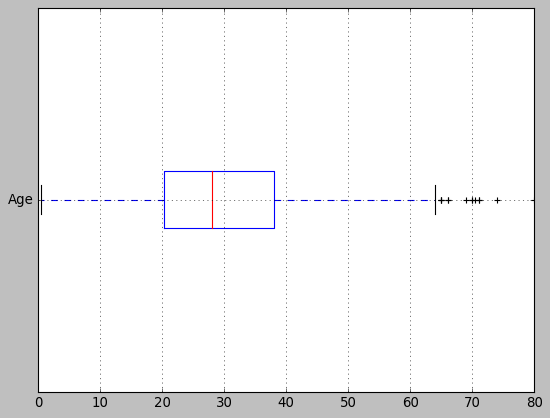

In [32]:
# your code here
titanic.boxplot(column='Age', vert=False)

In [33]:
"""
For this type of data the best plot is a Box plot. 
It allows a better overview of where the biggest concentration of data is.
"""

'\nFor this type of data the best plot is a Box plot. \nIt allows a better overview of where the biggest concentration of data is.\n'

#### What does the last plot tell you about the feature `Age`?

In [34]:
"""
There was a big concentration of people between their 20s and 40s  
"""

'\nThere was a big concentration of people between their 20s and 40s  \n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

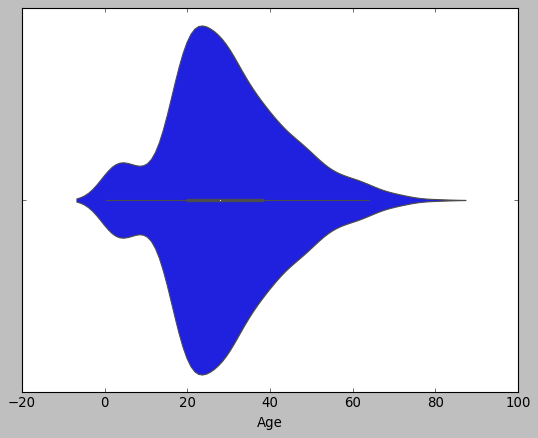

In [35]:
# your code here
sns.violinplot("Age", data=titanic)

#### What additional information does the last plot provide about feature `Age`?

In [36]:
"""
This plot type give us a better overview of the age distribution in the most dense area.
"""

'\nThis plot type give us a better overview of the age distribution in the most dense area.\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

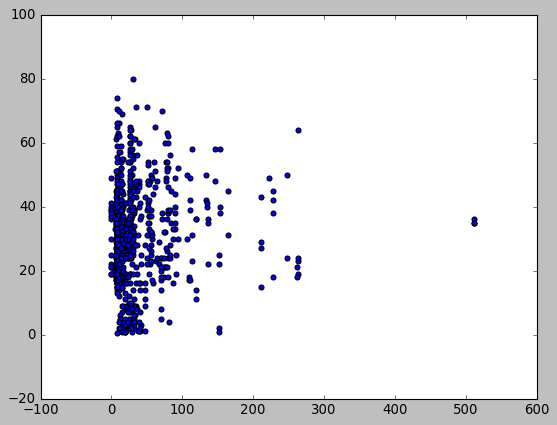

In [37]:
# Method 1 - matplotlib
# your code here
plt.scatter(titanic['Fare'], titanic['Age']);

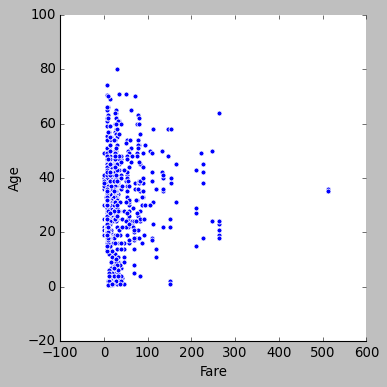

In [38]:
# Method 2 - seaborn
# your code here
sns.relplot(x='Fare', y='Age', data=titanic);

#### Plot the correlation matrix using seaborn.

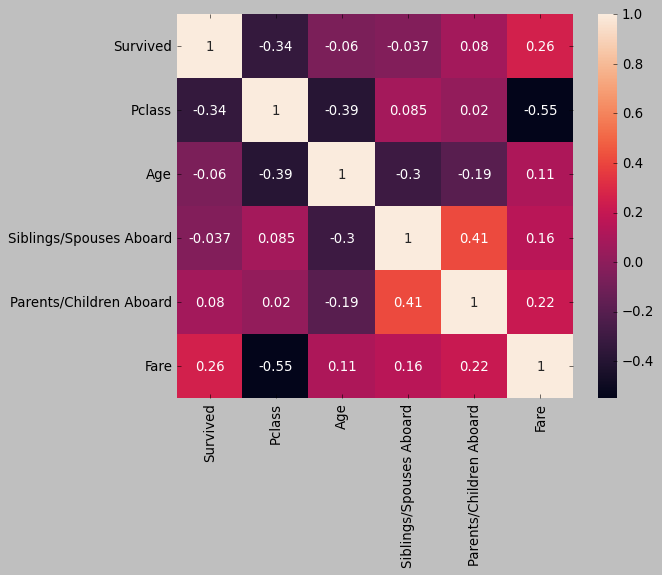

In [39]:
# your code here
sns.heatmap(titanic.corr(), annot = True)

#### What are the most correlated features?

In [40]:
"""
PClass and Fare
PClass and Age
Siblings/Spouses Aboard and Parents/Childs Aboard

"""

'\nPClass and Fare\nPClass and Age\nSiblings/Spouses Aboard and Parents/Childs Aboard\n\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

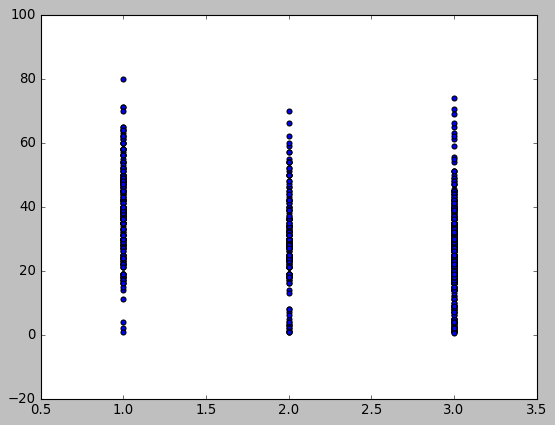

In [41]:
# your code here

plt.scatter(titanic['Pclass'], titanic['Age'])

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

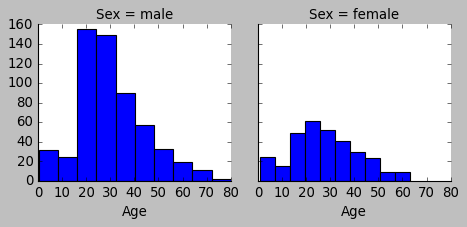

In [42]:
# your code here
f= sns.FacetGrid(titanic, col='Sex')
f.map(plt.hist, 'Age')
plt.show()